In [274]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.optimize import fmin_tnc

In [275]:
def sigmoid(x):
  x = np.array(x, dtype = float)
  # Activation function used to map any real value between 0 and 1
  return 1 / (1 + np.exp(-x))

In [276]:
def net_input(theta, x):
  # Computes the weighted sum of inputs Similar to Linear Regression
  return np.dot(x, theta)

In [277]:
def hypothesis(theta, x):
  # Calculates the probability that an instance belongs to a particular class
  return sigmoid(net_input(theta, x))

In [278]:
def cost_function(theta, x, y):
  # Computes the cost function for all the training samples
  m = x.shape[0]
  total_cost = -(1 / m) * np.sum(y * np.log(hypothesis(theta, x)) + (1 - y) * np.log(1 - hypothesis(theta, x)))
  return total_cost

In [279]:
def gradient(theta, x, y):
  # Computes the gradient of the cost function at the point theta
  m = x.shape[0]
  return (1 / m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

In [280]:
def fit(x, y, theta):
  """trains the model from the training data
  Uses the fmin_tnc function that is used to find the minimum for any function
  It takes arguments as
      1) func : function to minimize
      2) x0 : initial values for the parameters
      3) fprime: gradient for the function defined by 'func'
      4) args: arguments passed to the function
  Parameters
  ----------
  x: array-like, shape = [n_samples, n_features]
      Training samples
  y: array-like, shape = [n_samples, n_target_values]
      Target classes
  theta: initial weights
  Returns optimized weights
  -------
  """

  theta_opt = fmin_tnc(func=cost_function, x0=theta, fprime=gradient,
                          args=(x, y.flatten()))
  return theta_opt[0]

In [281]:
def predict(x, theta):
  """ Predicts the class labels
  Parameters
  ----------
  x: array-like, shape = [n_samples, n_features]
      Test samples
  Returns
  -------
  predicted class labels
  """
  return hypothesis(theta, x)

In [282]:
def accuracy(x, theta, actual_classes, probab_threshold=0.5):
  """Computes the accuracy of the classifier
  Parameters
  ----------
  x: array-like, shape = [n_samples, n_features]
      Training samples
  actual_classes : class labels from the training data set
  probab_threshold: threshold/cutoff to categorize the samples into different classes
  Returns
  -------
  accuracy: accuracy of the model
  """
  predicted_classes = (predict(x, theta) >= probab_threshold).astype(int)
  predicted_classes = predicted_classes.flatten()
  accuracy = np.mean(predicted_classes == actual_classes)
  return accuracy * 100

In [283]:
def load_data(path, header):
  marks_df = pd.read_csv(path, header=header)
  return marks_df

The accuracy of the model is 89.0
The model parameters using Gradient descent


[[-25.16131857]
 [  0.20623159]
 [  0.20147149]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


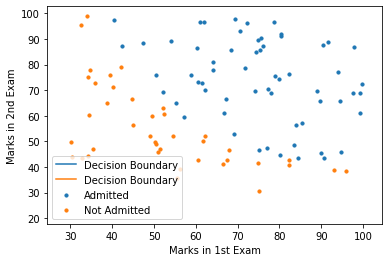

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score using scikit-learn is 0.89
The model parameters using scikit learn
[[-4.19885866e-08  2.05354461e-01  2.00583554e-01]]


In [284]:
data = load_data("https://raw.githubusercontent.com/virajkapurkar/Machine-Learning/main/data/marks.txt", None)

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,label='Not Admitted')

# preparing the data for building the model
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

# Logistic Regression from scratch using Gradient Descent
theta_opt = fit(X, y, theta)
theta_opt = np.reshape(theta_opt, (theta_opt.shape[0],1))
accuracy = accuracy(X, theta_opt, y.flatten())
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters using Gradient descent")
print("\n")
print(theta_opt)

# plotting the decision boundary
# As there are two features
# wo + w1x1 + w2x2 = 0
# x2 = - (wo + w1x1)/(w2)

x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
x_values = np.reshape(x_values, (1,2))

y_values = - (theta_opt[0] + np.dot(np.reshape(theta_opt[1], (1,1)), x_values)) / theta_opt[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

# Using scikit-learn
model = LogisticRegression()
model.fit(X, y)
parameters = model.coef_
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters using scikit learn")
print(parameters)